## 1. Peek at Our Data (PM2.5 Data of a Chinese City)

There is no substitute for looking at the raw data. In this notebook, I just project the columns without missing values to the better display of the potential and quality of this dataset.

Looking at the raw data can reveal insights that you cannot get any other way. It can also plant seeds that may later grow into ideas on how to better preprocess and handle the data for machine learning tasks.

In [26]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


df= pd.read_csv("C:\\Users\\YASAMAN\\Desktop\\pollution.csv", sep=',',low_memory=False)
df

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
5,2010-01-02 05:00:00,109.0,-7,-6.0,1022.0,SE,7.14,3,0
6,2010-01-02 06:00:00,105.0,-7,-6.0,1023.0,SE,8.93,4,0
7,2010-01-02 07:00:00,124.0,-7,-5.0,1024.0,SE,10.72,0,0
8,2010-01-02 08:00:00,120.0,-8,-6.0,1024.0,SE,12.51,0,0
9,2010-01-02 09:00:00,132.0,-7,-5.0,1025.0,SE,14.30,0,0


## 2. Dimensions of Our Data

We must have a very good handle on how much data we have, both in terms of rows and columns.

Too many rows and algorithms may take too long to train. Too few and perhaps you do not have enough data to train the algorithms.
Too many features and some algorithms can be distracted or suffer poor performance due to the curse of dimensionality.
You can review the shape and size of your dataset by printing the shape property.

In [27]:
# Dimensions of your data
print("Our data has dimention of {} Records and {} Columns or Features.".format(df.shape[0], df.shape[1]))

Our data has dimention of 43800 Records and 9 Columns or Features.


## 3. Data Type For Each Attribute

The type of each attribute is important.

Strings may need to be converted to floating point values or integers to represent categorical or ordinal values.

We can get an idea of the types of attributes by peeking at the raw data, as above. We can also list the data types used by the DataFrame to characterize each attribute using the dtypes property.


In [28]:
# Data Types for Each Attribute
types = df.dtypes

types.head(20)

date          object
pollution    float64
dew            int64
temp         float64
press        float64
wnd_dir       object
wnd_spd      float64
snow           int64
rain           int64
dtype: object

## 4. Good varation of goal feature


We have considerable variation for pollution feature (PM2.5 metric) which could be goal attribute for our regression analysis.

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


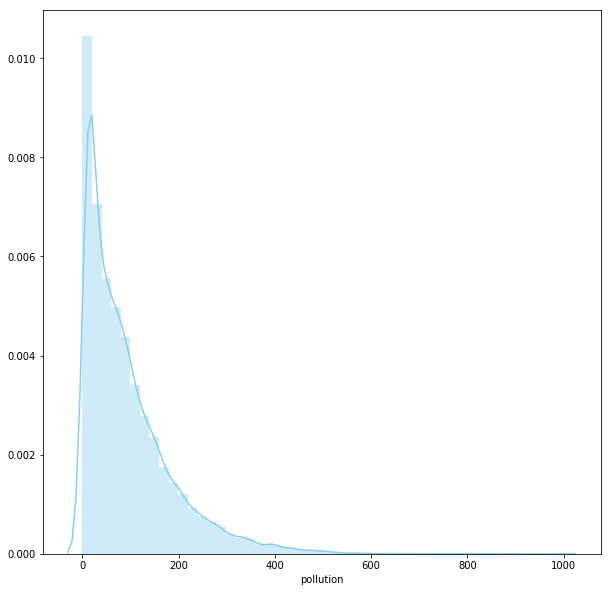

In [29]:
plt.rcParams['figure.figsize']=10,10
sns.distplot( df["pollution"] , color="skyblue", label="Body Measure Index")


## 5. Multiple indepentent features


Features like temperature, Dew point, wind spead and so on are valuable either to univariant or mutivariant analysis

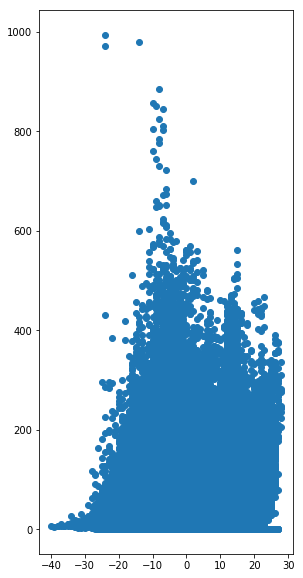

In [30]:
#relation between the pollution and Dew

fig = plt.figure()

ax1 = fig.add_subplot(122)
ax1.scatter(x=df['dew'],y=df['pollution'])

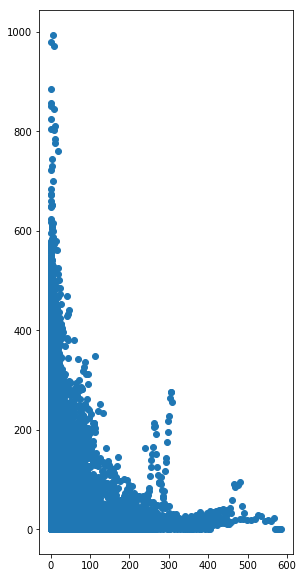

In [31]:
#relation between the pollution and wind speed

fig = plt.figure()

ax1 = fig.add_subplot(122)
ax1.scatter(x=df['wnd_spd'],y=df['pollution'])

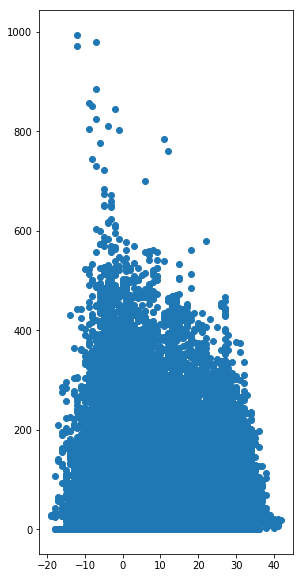

In [32]:
#relation between the pollution and temperature

fig = plt.figure()

ax1 = fig.add_subplot(122)
ax1.scatter(x=df['temp'],y=df['pollution'])

## 6. It can be led to data trajectory analysis!!


Two Features: date and wind direction when they followed sequentially would make the particle trajectories and it could be a sub project in this project.